# Import Library

In [1]:
import numpy as np
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline

# Import and Inspect Data Set

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
#Data Set Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
#Missing Values 
(df.isnull().sum()/len(df))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [5]:
# Duplicated Data 
df.duplicated().sum()

0

# EDA
# Find The Percentage of Rain and Not Rain 

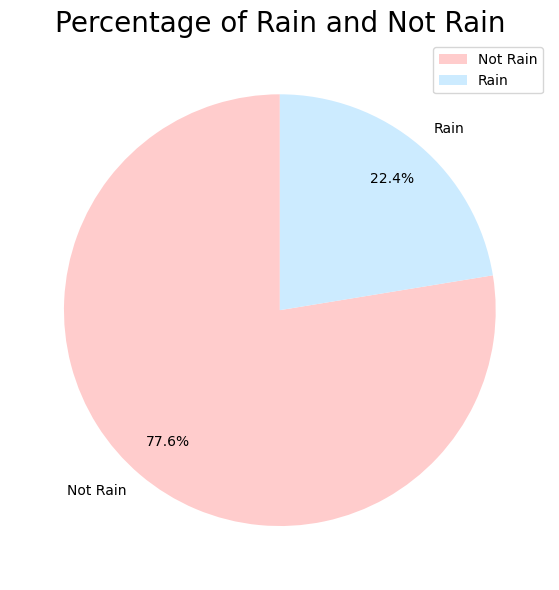

In [6]:
colors = ['#ffcccc','#ccebff']
df['RainTomorrow'].value_counts().plot(kind='pie',
               figsize=(17,6),
               autopct = '%1.1f%%',
               startangle=90,
               shadow=False,
               labels=['Not Rain','Rain'],
               colors=colors,
               pctdistance=0.8)
plt.title('Percentage of Rain and Not Rain', fontsize=20)
plt.tight_layout()
plt.legend()
plt.ylabel('')
plt.show()

# Rainy and not rainy days for each year

In [7]:
# split date column into year, month , and day columns
df[['Year', 'Month', 'Day']] = df['Date'].str.split('-', expand=True)

In [8]:
df['Year'].value_counts()

2016    17934
2014    17885
2015    17885
2009    16789
2010    16782
2013    16415
2012    15409
2011    15407
2017     8623
2008     2270
2007       61
Name: Year, dtype: int64

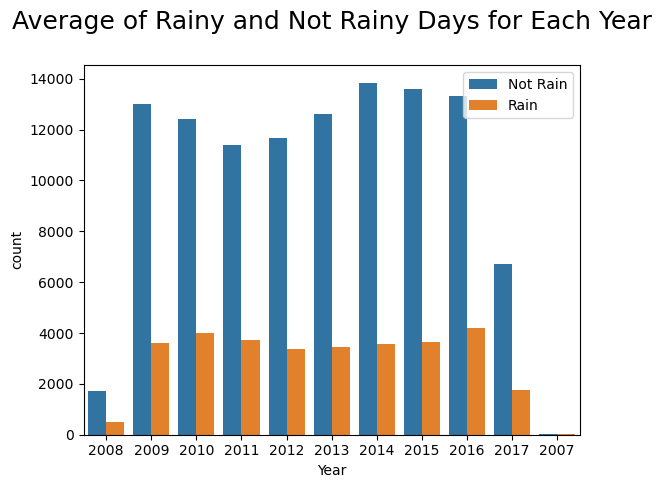

In [9]:
sns.countplot(x='Year', data=df , hue=df['RainTomorrow'])
plt.title('Average of Rainy and Not Rainy Days for Each Year\n', fontsize=18)
plt.legend(labels=['Not Rain','Rain'])
plt.show()

# Average of rainy and not rainy days for each month

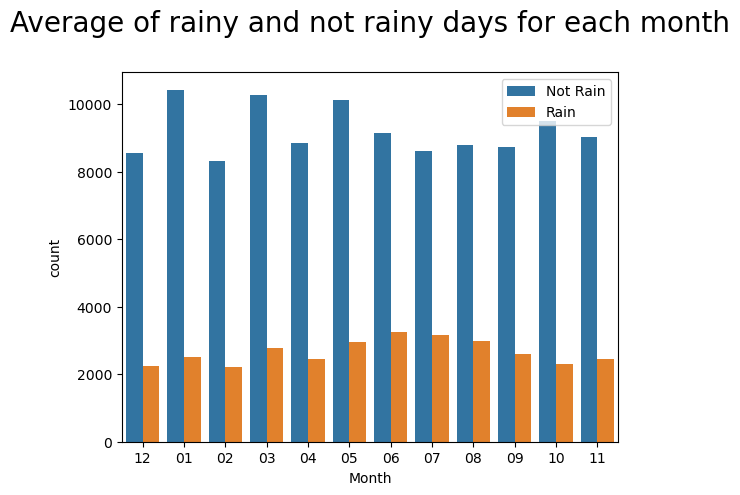

In [10]:
sns.countplot(x='Month', data=df,hue=df['RainTomorrow'])
plt.title('Average of rainy and not rainy days for each month\n', fontsize=20)
plt.legend(labels=['Not Rain','Rain'])
plt.show()

# Distribution of RainToday's Dataset

C:\Users\aqfie\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


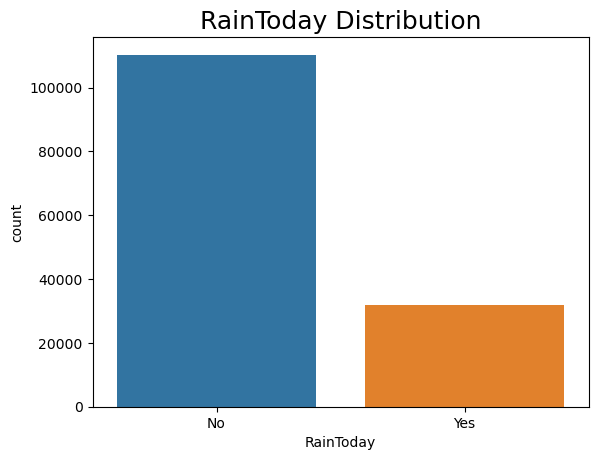

In [11]:
sns.countplot(df['RainToday'])
plt.title('RainToday Distribution', fontsize=18)
plt.show()

# Wind Direction

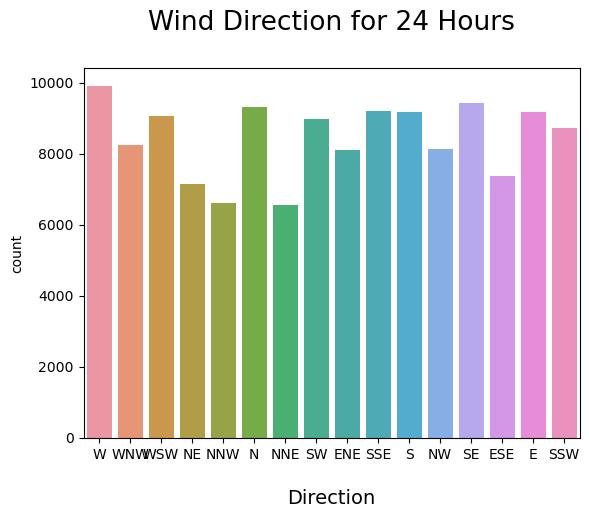

In [12]:
sns.countplot(x='WindGustDir', data=df)
plt.title('Wind Direction for 24 Hours\n', fontsize=19)
plt.xlabel('\nDirection', fontsize=14)
plt.show()

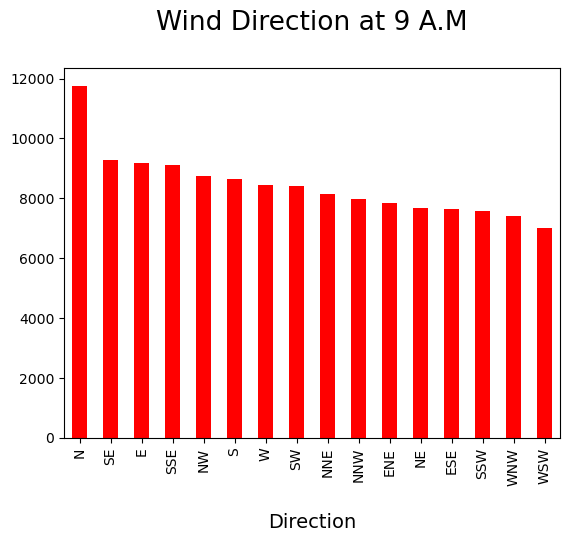

In [13]:
df['WindDir9am'].value_counts().plot(kind='bar', color='red')
plt.title('Wind Direction at 9 A.M\n', fontsize=19)
plt.xlabel('\nDirection', fontsize=14)
plt.show()

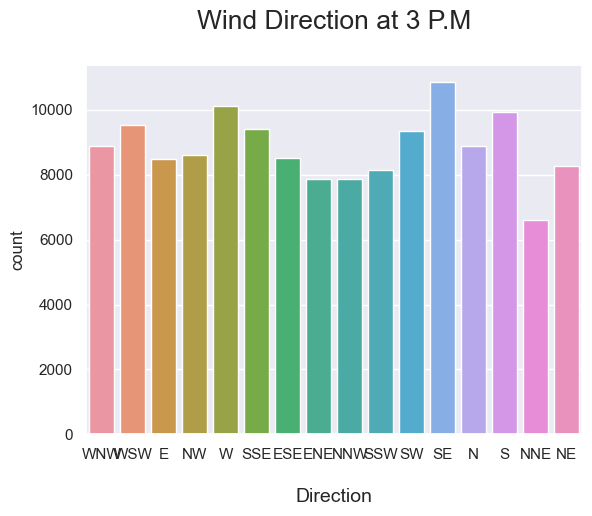

In [23]:
sns.countplot(x='WindDir3pm', data=df)
plt.title('Wind Direction at 3 P.M\n', fontsize=19)
plt.xlabel('\nDirection', fontsize=14)
plt.show()

# Temperature
## Distribution of MinTemp

C:\Users\aqfie\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


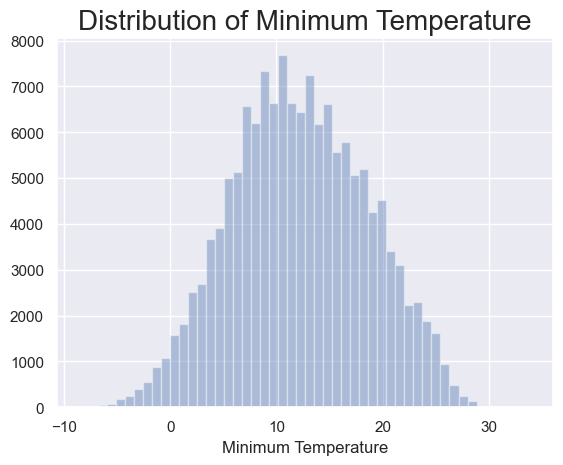

In [15]:
sns.set(color_codes = True)
sns.distplot(df.MinTemp, kde = False)
plt.title('Distribution of Minimum Temperature', fontsize=20)
plt.xlabel('Minimum Temperature')
plt.show()

## Distribution of MaxTemp

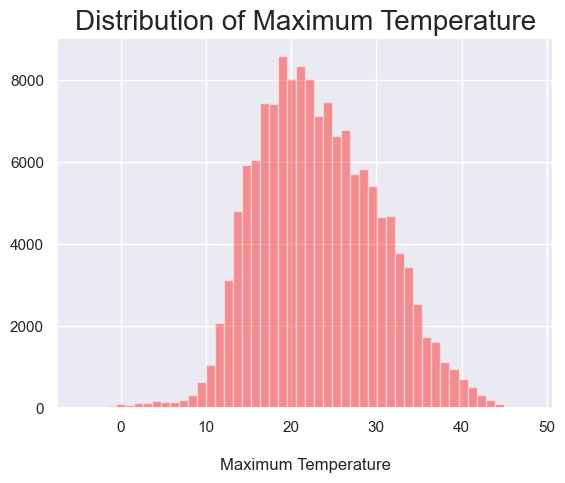

In [16]:
sns.distplot(df.MaxTemp, kde = False, color='red')
plt.title('Distribution of Maximum Temperature', fontsize=20)
plt.xlabel('\nMaximum Temperature')
plt.show()

## Check Correlation Between Minimum Temperature and Max Temp 

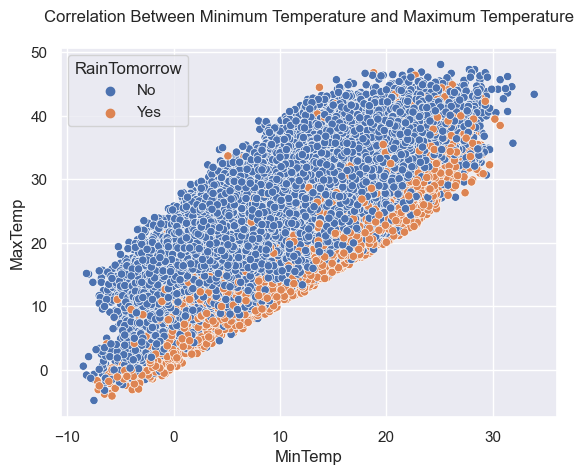

In [17]:
sns.scatterplot(x='MinTemp', y='MaxTemp', hue='RainTomorrow', data=df)
plt.title('Correlation Between Minimum Temperature and Maximum Temperature\n')
plt.show()

## Check correlation between max temp and sunshine 

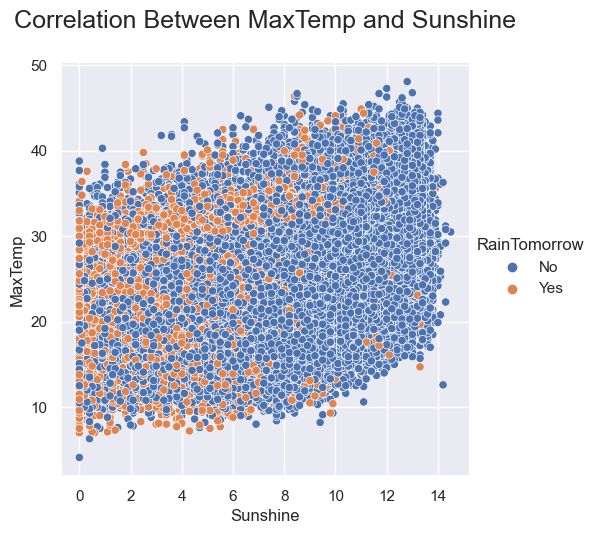

In [18]:
sns.relplot(x='Sunshine', y='MaxTemp', data=df, hue='RainTomorrow')
plt.title('Correlation Between MaxTemp and Sunshine\n', fontsize=18)
plt.show()

# Rainy or Not Rainy Days in Each Location

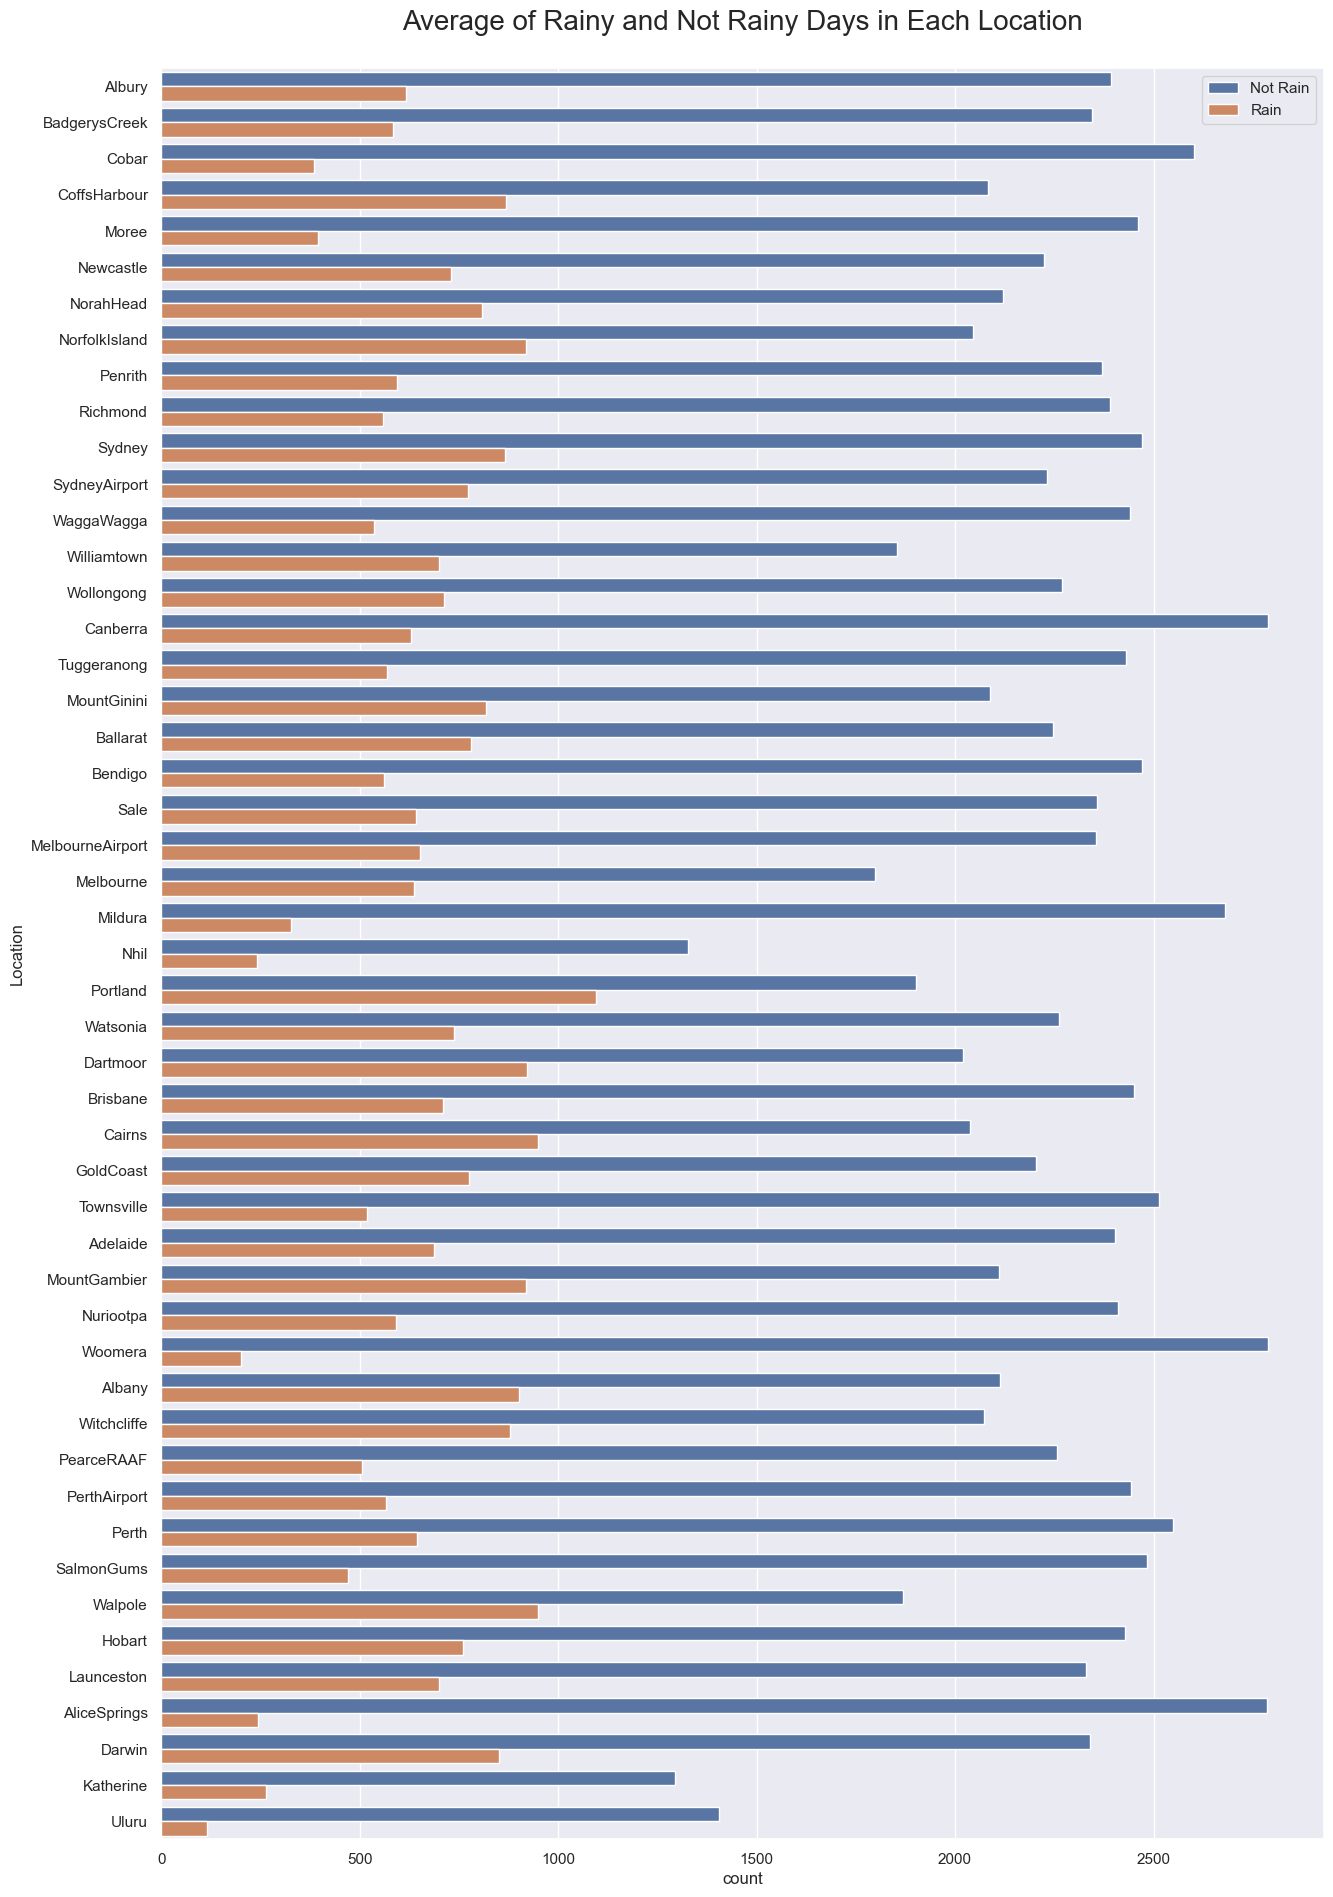

In [22]:
plt.figure(figsize = (15,23))
sns.countplot(y = 'Location',hue = 'RainTomorrow', data = df)
plt.title('Average of Rainy and Not Rainy Days in Each Location\n', fontsize=20)
plt.legend(labels=['Not Rain','Rain'])
plt.show()